In [222]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from scipy.optimize import*
from numpy import*

In [223]:
Milliken=pd.read_table("/Users/smoron/Documents/Data/Hydro&Climatedata/Milliken_ea_GEOSPHERE_forpython.csv",  sep=",")
Milliken = pd.DataFrame(Milliken, columns = Milliken.columns)
#print  (Milliken.columns)

In [224]:
Somme=pd.read_table('/Users/smoron/Documents/Data/Source_to_sink_measurements/Somme_etal_2009.csv', header=0, sep=",")
Somme_df = pd.DataFrame(Somme, columns = Somme.columns)#Still don't understand why I have to convert Nyberg into dataframe but it works 

Nyberg_Qs1MT_yr=pd.read_table('/Users/smoron/Documents/Data/Source_to_sink_measurements/Nyberg_Qs>1MT_yr.csv',  header=0, sep=",")
df = pd.DataFrame(Nyberg_Qs1MT_yr, columns = Nyberg_Qs1MT_yr.columns)#Still don't understand why I have to convert Nyberg into dataframe but it works 
#print (Nyberg_Qs1MT_yr.columns)

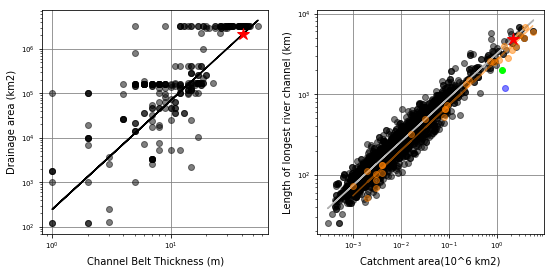

In [221]:
fig= plt.subplots( figsize=(7.8,7.8/2))# This size is in inches
plt.subplot(1,2,1)
#plt.ylim([-0.5,12.5])

plt.loglog(Milliken.Thickness_m, Milliken.Contributing_Drainage_Area_km2, 'o',c=(0,0,0,.5))
plt.xlabel('Channel Belt Thickness (m)')
plt.ylabel('Drainage area (km2)')
plt.grid(color='grey')
x=Milliken.Thickness_m
y=249*pow(x,2.44)
P90Martin=41.3
plt.plot(x, y, c='k', label='y=249x^2.44')
plt.plot(P90Martin, 249*pow(P90Martin,2.44),"*", c='r', markersize=12)
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7) 

############
plt.subplot(1,2,2)
m, c=np.polyfit(log(df.Area/1e6), log(df.River_L/1e3), 1) # getting the intercept and the slope
y_fit = np.exp(m*log(df.Area/1e6) + c) # calculate the fitted values of y 
plt.loglog(df.Area/1e6,df.River_L/1e3,'bo', c=(0,0,0,.5), label='Nyberg et al., 2018')
plt.loglog(df.Area[df.Structure_=='Passive Margin']/1e6,df.River_L[df.Structure_=='Passive Margin']/1e3,'bo', c=(0,0,0,.5), label='Nyberg et al., 2018')
plt.plot(df.Area/1e6, y_fit, c=(.7, .7, .7), label='y=76196 x^0.55')
# #Somme
x=Somme['Catchment area\n(× 106 km2)']
y=Somme['Length of longest\nriver channel (km)']
x.nna=x[~np.isnan(x)]#;print x.nna
y.nna=y[~np.isnan(y)]#; print y.nna
x=np.array(x.nna)
y=np.array(y.nna)
mS, cS=np.polyfit(log(x), log(y), 1) # getting the intercept and the slope
y_fit_S= np.exp(mS*log(x) + cS) # calculate the fitted values of y 
#Plot
plt.grid(color='grey')
plt.loglog(x,y,'o', c=(1,0.5,0,.5), label='S2S Somme et al 2009')
plt.plot(x, y_fit_S, c=(1,0.5,0,.5), label='y=2655.3x^0.56')
plt.plot(1.3, 2000, 'o', c=(0, 1, 0), label='Early Paleocene Paleo-Miss')
plt.plot(1.5, 1200, 'o', c=(0, 0, 1,.5), label='Oligocene paleo-Miss')
Mung_CA=249*pow(P90Martin,2.44)/1e6
plt.plot(Mung_CA, 3157* pow(Mung_CA, .54), "*", c='r', markersize=12)
plt.xlabel('Catchment area(10^6 km2)')
plt.ylabel('Length of longest river channel (km)')
#plt.legend(loc=0)
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7)  
plt.tight_layout()
plt.savefig("./WABS_scaling.pdf")


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


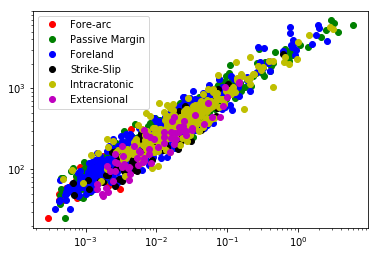

In [190]:
Basin_type=df.Structure_.unique()

num_plots=len(Basin_type)
#print(len(Basin_type))
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
my_colors = ['r', 'g', 'b', 'k', 'y', 'm']
#my_colors=[(1,0,0,.5), (0,1,0,.5), (0,0,1,.5), (1,1,0,.5), (0,1,1,.5), (1,1,1,.5)]
    
for i in range(len(Basin_type)):
    plt.loglog(df.Area[df.Structure_==Basin_type[i]]/1e6,df.River_L[df.Structure_==Basin_type[i]]/1e3,'o', c=my_colors[i], label=Basin_type[i])
plt.legend()
